In [1]:
#!pip install tensorflow

# **import the library  **

In [3]:
import os
import sys
print('okk')


import numpy as np
import matplotlib.pyplot as plt
print('byyy')

from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
import datetime
import glob
import random
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam,RMSprop



from pandas import DataFrame
print('byyy')

byyy


In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
inputs=[]
target_contour=[]
target_mask=[]
target_small_mask=[]
target_contour_fine=[]




import os
for dirname, _, filenames in os.walk('/kaggle/input/data-cs/data_cs/input'):
    for filename in filenames:
        inputs.append(os.path.join(dirname, filename))
        
        
for dirname, _, filenames in os.walk('/kaggle/input/data-cs/data_cs/target_contour'):
    for filename in filenames:
        target_contour.append(os.path.join(dirname, filename))        
    
for dirname, _, filenames in os.walk('/kaggle/input/data-cs/data_cs/target_contour_fine'):
    for filename in filenames:
        target_contour_fine.append(os.path.join(dirname, filename))   
        
        
for dirname, _, filenames in os.walk('/kaggle/input/data-cs/data_cs/target_mask'):
    for filename in filenames:
        target_mask.append(os.path.join(dirname, filename))
    
    
for dirname, _, filenames in os.walk('/kaggle/input/data-cs/data_cs/target_small_mask'):
    for filename in filenames:
        target_small_mask.append(os.path.join(dirname, filename)) 
    

# function from gihub to download tha data

In [6]:

def loadIm(fname, tname, data, target, step=512, newpx = 512, px = 2048):    
    im = plt.imread(fname)
    #px = 2048 #im.size #TODO: FIX THIS IT WILL BREAK EVERYTHING
    print('max: ' + str(im.max()) + ', min: ' + str(im.min()) + ', mean: ' + str(im.mean()))
    tim = 1*(plt.imread(tname)>0) #makes values of target binary
    counter = 0
    print(im.shape)
    print(tim.shape)
    for y in range(0,px,step): #no need to sub 512 b/c px are mult of 512
        for x in range(0,px,step):
            data.append(im[x:x+newpx,y:y+newpx].reshape((newpx,newpx,1)))
            target.append(tim[x:x+newpx,y:y+newpx].reshape((newpx,newpx,1)))

# preprocecing the images and load the data 

In [7]:
data_arr= inputs
targ_arr=target_mask
train_dataset=[]
train_target=[]
val_dataset=[]
val_target=[]
num_train=20
num_val=4
px=2024
import matplotlib.pyplot as plt
tile_order_arr=list(range(24))
for f in tile_order_arr[0:num_train]:  
                    loadIm(data_arr[f], targ_arr[f], train_dataset, train_target, px=px)
                    
#changes values from [0,1] to [-1,1], convert to numpy array
train_dataset = 2*np.array(train_dataset)-1 
#convert to numpy array
train_target = np.array(train_target)
for f in tile_order_arr[num_train:(num_train+num_val)]:    
                    loadIm(data_arr[f], targ_arr[f], val_dataset, val_target, px=px)
                                        
#changes values from [0,1] to [-1,1], convert to numpy array
val_dataset = 2*np.array(val_dataset)-1 
#convert to numpy array
val_target = np.array(val_target)
    

    

max: 1.0, min: 0.003921569, mean: 0.48980218
(7680, 7680)
(7680, 7680)
max: 1.0, min: 0.003921569, mean: 0.49112135
(7680, 7680)
(7680, 7680)
max: 1.0, min: 0.003921569, mean: 0.49150208
(7680, 7680)
(7680, 7680)
max: 1.0, min: 0.003921569, mean: 0.49216554
(7680, 7680)
(7680, 7680)
max: 1.0, min: 0.003921569, mean: 0.4921209
(7680, 7680)
(7680, 7680)
max: 1.0, min: 0.003921569, mean: 0.48936468
(7680, 7680)
(7680, 7680)
max: 1.0, min: 0.003921569, mean: 0.4936926
(7680, 7680)
(7680, 7680)
max: 1.0, min: 0.003921569, mean: 0.49044687
(7680, 7680)
(7680, 7680)
max: 1.0, min: 0.003921569, mean: 0.49279016
(7680, 7680)
(7680, 7680)
max: 1.0, min: 0.003921569, mean: 0.49284
(7680, 7680)
(7680, 7680)
max: 1.0, min: 0.003921569, mean: 0.49340466
(7680, 7680)
(7680, 7680)
max: 1.0, min: 0.003921569, mean: 0.49317557
(7680, 7680)
(7680, 7680)
max: 1.0, min: 0.003921569, mean: 0.49141392
(7680, 7680)
(7680, 7680)
max: 1.0, min: 0.003921569, mean: 0.4934742
(7680, 7680)
(7680, 7680)
max: 1.0, mi

In [8]:
print("shape of train_dataset", train_dataset.shape)
print("shape of train_target", train_target.shape)
print("shape of val_dataset",val_dataset.shape)
print("shape of val_dataset",val_target.shape)

shape of train_dataset (320, 512, 512, 1)
shape of train_target (320, 512, 512, 1)
shape of val_dataset (64, 512, 512, 1)
shape of val_dataset (64, 512, 512, 1)


# Download train_dataset and validation dataset 

In [9]:
import pickle
# Save the serialized data to a file
with open("train_dataset.pkl", "wb") as f:
    f.write(train_dataset)

# Save the serialized data to a file
with open("train_target.pkl", "wb") as f:
    f.write(train_target)


# Save the serialized data to a file
with open("val_dataset.pkl", "wb") as f:
    f.write(val_dataset)

# Save the serialized data to a file
with open("val_target.pkl", "wb") as f:
    f.write(val_target)



# building the U-Ned model 

In [111]:
def unet1(): 
    ACT = 'relu'
    KERN_SIZE = 3
    FILTERS=[16,24,32,48,64,96,128,128]
    
    z1 = Input(shape=(None,None,1))
    print('z1: {}'.format(z1.shape))

    z2 = Conv2D(FILTERS[0], KERN_SIZE, padding='same', activation=ACT)(z1)
    p2 = AveragePooling2D(pool_size=2)(z2)
    print('z2: {}, \np2: {}'.format(z2.shape, p2.shape))

    z3 = Conv2D(FILTERS[1], KERN_SIZE, padding='same', activation=ACT)(p2)
    p3 = AveragePooling2D(pool_size=2)(z3)
    print('z3: {}, \np3: {}'.format(z3.shape, p3.shape))

    z4 = Conv2D(FILTERS[2], KERN_SIZE, padding='same', activation=ACT)(p3)
    d4 = Dropout(0.2)(z4)
    p4 = AveragePooling2D(pool_size=2)(d4)
    print('z4: {}, \np4: {}'.format(z4.shape, p4.shape))

    z5 = Conv2D(FILTERS[3], KERN_SIZE, padding='same', activation=ACT)(p4)
    d5 = Dropout(0.2)(z5)
    p5 = AveragePooling2D(pool_size=2)(d5)
    print('z5: {}'.format(z5.shape))

    z6 = Conv2D(FILTERS[4], KERN_SIZE, padding='same', activation=ACT)(p5)
    d6 = Dropout(0.3)(z6)
    p6 = AveragePooling2D(pool_size=2)(d6)

    z7 = Conv2D(FILTERS[5], KERN_SIZE, padding='same', activation=ACT)(p6)
    d7 = Dropout(0.4)(z7)
    p7 = AveragePooling2D(pool_size=2)(d7)

    z8 = Conv2D(FILTERS[6], KERN_SIZE, padding='same', activation=ACT)(p7)
    d8 = Dropout(0.5)(z8)
    p8 = AveragePooling2D(pool_size=2)(d8)

    z9 = Conv2D(FILTERS[7], KERN_SIZE, padding='same', activation=ACT)(p8)
    d9 = Dropout(0.5)(z9)

    u9 = UpSampling2D(size=2)(d9)
    q9 = Conv2D(FILTERS[6], KERN_SIZE, padding='same', activation=ACT)(u9)
    d9b = Dropout(0.5)(q9)
    a9 = Add()([d9b,z8])

    u8 = UpSampling2D(size=2)(a9)
    q8 = Conv2D(FILTERS[5], KERN_SIZE, padding='same', activation=ACT)(u8)
    d8b = Dropout(0.4)(q8)
    a8 = Add()([d8b,z7])

    u7 = UpSampling2D(size=2)(a8)
    q7 = Conv2D(FILTERS[4], KERN_SIZE, padding='same', activation=ACT)(u7)
    d7b = Dropout(0.3)(q7)
    a7 = Add()([d7b,z6])

    u6 = UpSampling2D(size=2)(a7)
    q6 = Conv2D(FILTERS[3], KERN_SIZE, padding='same', activation='relu')(u6)
    d6b = Dropout(0.2)(q6)
    a6 = Add()([d6b,z5])

    u5 = UpSampling2D(size=2)(a6)
    q5 = Conv2D(FILTERS[2], KERN_SIZE, padding='same', activation=ACT)(u5)
    d5b = Dropout(0.2)(q5)
    a5 = Add()([d5b,z4])

    u4 = UpSampling2D(size=2)(a5)
    q4 = Conv2D(FILTERS[1], KERN_SIZE, padding='same', activation=ACT)(u4)
    a4 = Add()([q4,z3])

    u3 = UpSampling2D(size=2)(a4)
    q3 = Conv2D(FILTERS[0], KERN_SIZE, padding='same', activation=ACT)(u3)
    a3 = Add()([q3,z2])

    z_final = Conv2D(1, KERN_SIZE, padding='same', activation='sigmoid')(a3)
    #z8 activation = sigmoid or softmax

    return Model(inputs = z1, outputs = z_final)
model1=unet1()
model1.summary()

z1: (None, None, None, 1)
z2: (None, None, None, 16), 
p2: (None, None, None, 16)
z3: (None, None, None, 24), 
p3: (None, None, None, 24)
z4: (None, None, None, 32), 
p4: (None, None, None, 32)
z5: (None, None, None, 48)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, None, None, 1 160         input_3[0][0]                    
__________________________________________________________________________________________________
average_pooling2d_14 (AveragePo (None, None, None, 1 0           conv2d_32[0][0]                  
_____________________________________________________________________

# Compile the model 
**use binary_crossentrophy as loss function and acc as accuracy**

In [15]:
adam = Adam(lr=1e-4) #adam = updates, learning
model1.compile(adam, loss = 'binary_crossentropy', metrics=['acc']) #loss = log_loss or binary_crossentrophy

# fit the data 

In [16]:
#make w calback
ckpt = ModelCheckpoint(
    filepath='model_plant.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
    )
#fit the data
history_addl = model1.fit(train_dataset,train_target,batch_size = 10, epochs=25, validation_data=(val_dataset,val_target),callbacks=ckpt, shuffle=True)



2022-12-16 13:25:54.632133: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
32/32 [==============================] - 77s 2s/step - loss: 0.5987 - acc: 0.7570 - val_loss: 0.3320 - val_acc: 0.9297
Epoch 2/25
32/32 [==============================] - 71s 2s/step - loss: 0.4822 - acc: 0.8361 - val_loss: 0.3716 - val_acc: 0.9297
Epoch 3/25
32/32 [==============================] - 73s 2s/step - loss: 0.4766 - acc: 0.8362 - val_loss: 0.3987 - val_acc: 0.9297
Epoch 4/25
32/32 [==============================] - 74s 2s/step - loss: 0.4654 - acc: 0.8362 - val_loss: 0.3322 - val_acc: 0.9297
Epoch 5/25
32/32 [==============================] - 73s 2s/step - loss: 0.4619 - acc: 0.8362 - val_loss: 0.3403 - val_acc: 0.9297
Epoch 6/25
32/32 [==============================] - 74s 2s/step - loss: 0.4609 - acc: 0.8362 - val_loss: 0.3040 - val_acc: 0.9297
Epoch 7/25
32/32 [==============================] - 74s 2s/step - loss: 0.4642 - acc: 0.8362 - val_loss: 0.3204 - val_acc: 0.9297
Epoch 8/25
32/32 [==============================] - 73s 2s/step - loss: 0.4552 - acc: 0.83

# Save the model1

In [17]:
model1.save('model1.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# plot the evolution of acuuracy and loss function

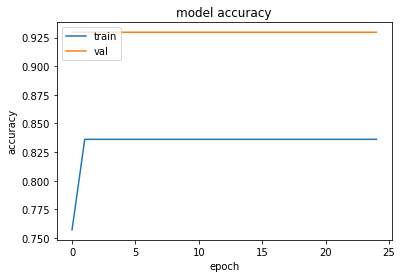

In [36]:
plt.plot(history_addl.history['acc'])
plt.plot(history_addl.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

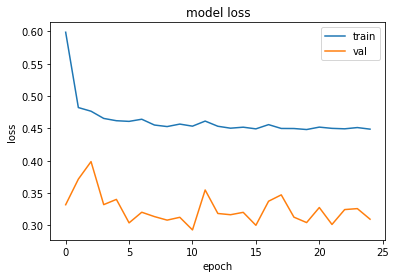

In [37]:
plt.plot(history_addl.history['loss'])
plt.plot(history_addl.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Evaluate the model

In [30]:
test_loss, test_acc = model1.evaluate(val_dataset, val_target, verbose=0)


0.309654176235199

In [32]:

# Print the results
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.309654176235199
Test accuracy: 0.9296865463256836


In [33]:
predict1=model1.predict(val_dataset[:32])
val_dataset[:32]

# Expiriance2

In [71]:
#change learning_rate
Adam = Adam(lr=0.001) #adam = updates, learning
model1.compile(adam, loss = 'binary_crossentropy', metrics=['acc']) #loss = log_loss or binary_crossentrophy
from tensorflow.keras.callbacks import ModelCheckpoint
ckpt = ModelCheckpoint(
    filepath='model_plant.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
    )
history_addl = model1.fit(train_dataset,train_target,batch_size = 10, epochs=20, validation_data=(val_dataset,val_target),callbacks=ckpt, shuffle=True)


Epoch 1/20
32/32 [==============================] - 73s 2s/step - loss: 0.3938 - acc: 0.8428 - val_loss: 0.3586 - val_acc: 0.8955
Epoch 2/20
32/32 [==============================] - 71s 2s/step - loss: 0.3892 - acc: 0.8436 - val_loss: 0.3779 - val_acc: 0.8868
Epoch 3/20
32/32 [==============================] - 71s 2s/step - loss: 0.3860 - acc: 0.8448 - val_loss: 0.4547 - val_acc: 0.8403
Epoch 4/20
32/32 [==============================] - 71s 2s/step - loss: 0.3914 - acc: 0.8439 - val_loss: 0.3469 - val_acc: 0.8882
Epoch 5/20
32/32 [==============================] - 72s 2s/step - loss: 0.3852 - acc: 0.8461 - val_loss: 0.3928 - val_acc: 0.8541
Epoch 6/20
32/32 [==============================] - 71s 2s/step - loss: 0.4145 - acc: 0.8371 - val_loss: 0.3457 - val_acc: 0.8900
Epoch 7/20
32/32 [==============================] - 71s 2s/step - loss: 0.3920 - acc: 0.8434 - val_loss: 0.3626 - val_acc: 0.8799
Epoch 8/20
32/32 [==============================] - 71s 2s/step - loss: 0.3840 - acc: 0.84

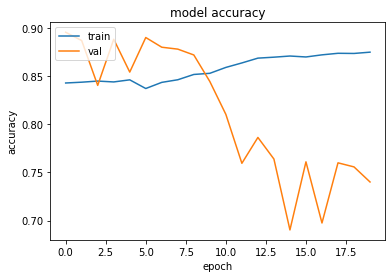

In [72]:
plt.plot(history_addl.history['acc'])
plt.plot(history_addl.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

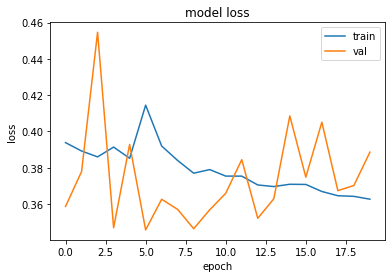

In [75]:
plt.plot(history_addl.history['loss'])
plt.plot(history_addl.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [74]:
test_loss, test_acc = model1.evaluate(val_dataset, val_target, verbose=0)

# Print the results
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.3885791003704071
Test accuracy: 0.7400763630867004


tayya7 learning rate 5irr 

**the model is verry bad with learning_rate=0.001**

# Expiriance 3

we use RMSprop as a optimazer

In [55]:
from tensorflow.keras.optimizers import Adam,RMSprop
#change learning_rate
RMSprop = RMSprop(learning_rate=0.000001, decay=0.9, momentum=0.9) #adam = updates, learning
model1.compile(RMSprop, loss = 'binary_crossentropy', metrics=['acc']) #loss = log_loss or binary_crossentrophy
from tensorflow.keras.callbacks import ModelCheckpoint
ckpt = ModelCheckpoint(
    filepath='model_plant.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
    )
history_addl = model1.fit(train_dataset,train_target,batch_size = 10, epochs=20, validation_data=(val_dataset,val_target),callbacks=ckpt, shuffle=True)


Epoch 1/20
32/32 [==============================] - 75s 2s/step - loss: 0.4429 - acc: 0.8362 - val_loss: 0.2842 - val_acc: 0.9297
Epoch 2/20
32/32 [==============================] - 71s 2s/step - loss: 0.4435 - acc: 0.8362 - val_loss: 0.2997 - val_acc: 0.9297
Epoch 3/20
32/32 [==============================] - 72s 2s/step - loss: 0.4436 - acc: 0.8362 - val_loss: 0.3133 - val_acc: 0.9297
Epoch 4/20
32/32 [==============================] - 71s 2s/step - loss: 0.4463 - acc: 0.8362 - val_loss: 0.3083 - val_acc: 0.9297
Epoch 5/20
32/32 [==============================] - 72s 2s/step - loss: 0.4479 - acc: 0.8362 - val_loss: 0.3491 - val_acc: 0.9297
Epoch 6/20
32/32 [==============================] - 71s 2s/step - loss: 0.4442 - acc: 0.8362 - val_loss: 0.2974 - val_acc: 0.9297
Epoch 7/20
32/32 [==============================] - 72s 2s/step - loss: 0.4420 - acc: 0.8362 - val_loss: 0.3210 - val_acc: 0.9297
Epoch 8/20
32/32 [==============================] - 71s 2s/step - loss: 0.4428 - acc: 0.83

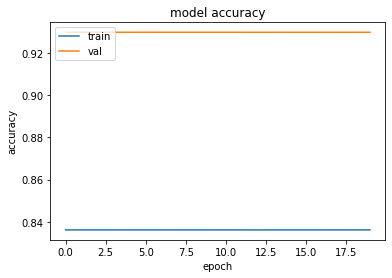

In [56]:
 plt.plot(history_addl.history['acc'])
plt.plot(history_addl.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

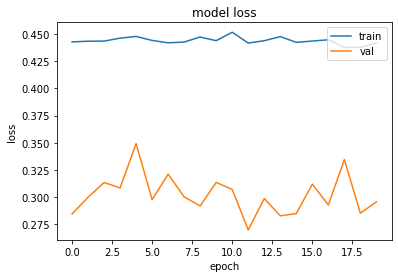

In [57]:
plt.plot(history_addl.history['loss'])
plt.plot(history_addl.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [58]:
test_loss, test_acc = model1.evaluate(val_dataset, val_target, verbose=0)

# Print the results
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.295434832572937
Test accuracy: 0.9296814799308777


# Expiriance4

In [59]:
#change learning_rate decay and momentum
RMSprop = RMSprop(learning_rate=0.00001, decay=0.5, momentum=0.5) #adam = updates, learning
model1.compile(RMSprop, loss = 'binary_crossentropy', metrics=['acc']) #loss = log_loss or binary_crossentrophy
from tensorflow.keras.callbacks import ModelCheckpoint
ckpt = ModelCheckpoint(
    filepath='model_plant.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
    )
history_addl = model1.fit(train_dataset,train_target,batch_size = 10, epochs=20, validation_data=(val_dataset,val_target),callbacks=ckpt, shuffle=True)


Epoch 1/20
32/32 [==============================] - 72s 2s/step - loss: 0.4318 - acc: 0.8361 - val_loss: 0.2857 - val_acc: 0.9297
Epoch 2/20
32/32 [==============================] - 71s 2s/step - loss: 0.4341 - acc: 0.8361 - val_loss: 0.3004 - val_acc: 0.9297
Epoch 3/20
32/32 [==============================] - 71s 2s/step - loss: 0.4350 - acc: 0.8361 - val_loss: 0.2980 - val_acc: 0.9297
Epoch 4/20
32/32 [==============================] - 71s 2s/step - loss: 0.4279 - acc: 0.8362 - val_loss: 0.3209 - val_acc: 0.9297
Epoch 5/20
32/32 [==============================] - 71s 2s/step - loss: 0.4342 - acc: 0.8361 - val_loss: 0.3700 - val_acc: 0.9297
Epoch 6/20
32/32 [==============================] - 72s 2s/step - loss: 0.4335 - acc: 0.8361 - val_loss: 0.3133 - val_acc: 0.9297
Epoch 7/20
32/32 [==============================] - 71s 2s/step - loss: 0.4257 - acc: 0.8361 - val_loss: 0.3128 - val_acc: 0.9297
Epoch 8/20
32/32 [==============================] - 71s 2s/step - loss: 0.4238 - acc: 0.83

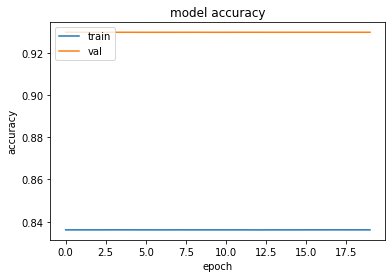

In [60]:
 plt.plot(history_addl.history['acc'])
plt.plot(history_addl.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

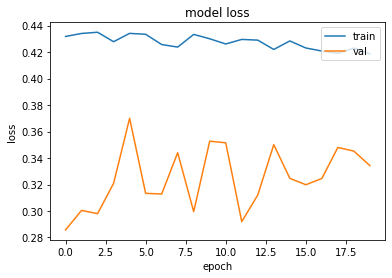

In [61]:
plt.plot(history_addl.history['loss'])
plt.plot(history_addl.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [62]:
test_loss, test_acc = model1.evaluate(val_dataset, val_target, verbose=0)

# Print the results
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.33425599336624146
Test accuracy: 0.9296762347221375


after theses experiances we choose as an optimazer Adam with a learning_rate=0.0001

# the best Experiance

In [77]:
#change learning_rate
model1.compile(adam, loss = 'binary_crossentropy', metrics=['acc']) #loss = log_loss or binary_crossentrophy
from tensorflow.keras.callbacks import ModelCheckpoint
ckpt = ModelCheckpoint(
    filepath='model_plant.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
    )
history_addl = model1.fit(train_dataset,train_target,batch_size = 10, epochs=20, validation_data=(val_dataset,val_target),callbacks=ckpt, shuffle=True)


Epoch 1/20
32/32 [==============================] - 77s 2s/step - loss: 0.3226 - acc: 0.8897 - val_loss: 0.3930 - val_acc: 0.7691
Epoch 2/20
32/32 [==============================] - 71s 2s/step - loss: 0.3216 - acc: 0.8891 - val_loss: 0.6087 - val_acc: 0.6920
Epoch 3/20
32/32 [==============================] - 72s 2s/step - loss: 0.3359 - acc: 0.8749 - val_loss: 0.4245 - val_acc: 0.7359
Epoch 4/20
32/32 [==============================] - 72s 2s/step - loss: 0.3125 - acc: 0.8905 - val_loss: 0.4892 - val_acc: 0.7195
Epoch 5/20
32/32 [==============================] - 71s 2s/step - loss: 0.3182 - acc: 0.8857 - val_loss: 0.4070 - val_acc: 0.7826
Epoch 6/20
32/32 [==============================] - 71s 2s/step - loss: 0.3100 - acc: 0.8912 - val_loss: 0.3266 - val_acc: 0.8717
Epoch 7/20
32/32 [==============================] - 71s 2s/step - loss: 0.3197 - acc: 0.8882 - val_loss: 0.3490 - val_acc: 0.8419
Epoch 8/20
32/32 [==============================] - 72s 2s/step - loss: 0.3313 - acc: 0.87

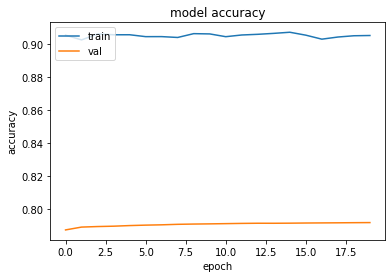

In [81]:
 plt.plot(history_addl.history['acc'])
plt.plot(history_addl.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

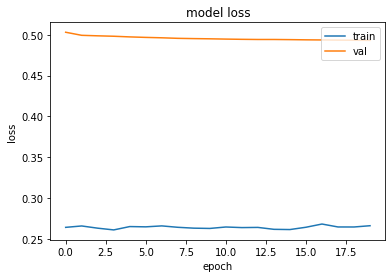

In [82]:
plt.plot(history_addl.history['loss'])
plt.plot(history_addl.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [84]:
test_los, test_ac = model1.evaluate(val_dataset, val_target, verbose=0)

# Print the results
print('Test loss:', test_los)
print('Test accuracy:', test_ac)

Test loss: 0.4931349754333496
Test accuracy: 0.7920119762420654


In [85]:
model1.save('best_model1.h5')


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# the prediction

In [87]:
#prediction
pred=model1.predict(val_dataset)

In [88]:
#save the model
best_model=load_model("/kaggle/working/best_model1.h5")

In [89]:
target_pred=model1.predict(val_dataset)

In [91]:
# Save the serialized data to a file
with open("target_pred.pkl", "wb") as f:
    f.write(target_pred)

In [93]:

def remake_tile(images, tile_size=7680, stp=512, SAVE=False, SHOW=False, img_fn=None):
    #figure out the grid size
    num_images = len(images)
    grid_size = int(np.sqrt(num_images))
    #stp = 512
    
    #make list of coordinates 
    coords = []
    for x in range(grid_size):
        for y in range(grid_size):
            coords.append([x*stp, y*stp])
    grid_tile = np.zeros((tile_size,tile_size))

    #place each subtile in the larger tile
    for i, im in enumerate(images):
        grid_tile[coords[i][1]:coords[i][1]+stp,coords[i][0]:coords[i][0]+stp] = im[:,:,0]
        
    if(SHOW):
        plt.imshow(grid_tile)
        plt.gcf().set_size_inches((12,12))
        plt.show()
    
    if(SAVE and img_fn is not None):
        plt.imsave(img_fn+'.png',grid_tile)
        
    return grid_tile 


In [107]:
tile_data_pred = remake_tile(target_pred, tile_size=7680, SHOW=False)
tile_val_dat = remake_tile(val_dataset, tile_size=7680, SHOW=False)
tile_val_target = remake_tile(val_target, tile_size=7680, SHOW=False)


# Result after segmenrtation

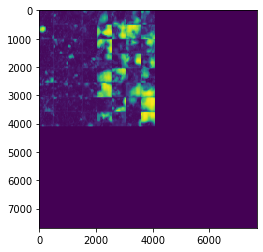

In [108]:
plt.imshow(tile_data_pred)

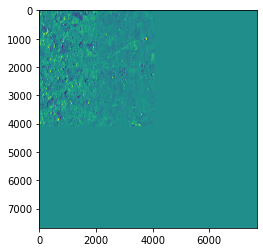

In [104]:
plt.imshow(tile_val_dat)


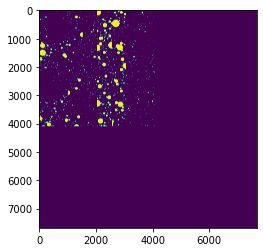

In [105]:
plt.imshow(tile_val_target)


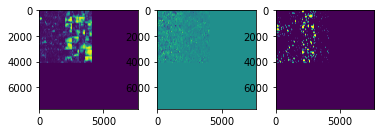

In [110]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, ax = plt.subplots(1, 3)

# Display the first image in the first subplot
ax[0].imshow(tile_data_pred)

# Display the second image in the second subplot
ax[1].imshow(tile_val_dat)

# Display the third image in the third subplot
ax[2].imshow(tile_val_target)

# Show the plot
plt.show()